# Recovering Supply and Demand Curves via IV regressions

## Motivation

The classic supply and demand model relies on a system of linear equations to determine the equilibrium price and quantity. However, in practice, we often do not have access to the supply and demand curves. Instead, we only observe the equilibrium price and quantity. In order to recover the supply and demand curves, we will be making asusmptions about the functional forms of supply and demand in order to construct a structual model. We will then use IV regressions to estimate the parameters of the structural model. <br><br>

The supply and demand curves will be specified as follows:

$\Large{Q^{d}_{i} = \beta^{d}_{1} \cdot P_{i} + \beta_{2}^{d} \cdot Y_{i} + u_{i}^{d}}$

$\Large{Q^{s}_{i} = \beta^{s}_{1} \cdot P_{i} + \beta_{2}^{s} \cdot r_{i} + u_{i}^{s}}$

Where $Q^{d}_{i}$ and $Q^{s}_{i}$ are the demand and supply curves for good $i$, respectively. $P_{i}$ is the price of good $i$, $Y_{i}$ is the income of the consumer, and $r_{i}$ is the interets rate. $u_{i}^{d}$ and $u_{i}^{s}$ are the error terms for the demand and supply curves, respectively. <br><br>

When solving for this system of linear equations, we will get the following term for price:

$\Large{P_{i} = \frac{\beta_{2}^{d}}{\beta_{1}^{s} - \beta_{1}^{d}} \cdot Y_{i} + \frac{\beta_{2}^{s}}{\beta_{1}^{s} - \beta_{1}^{d}} \cdot r_{u} - \frac{u_{i}^{d} - u_{i}^{s}}{\beta_{1}^{s} - \beta_{1}^{d}}}$ <br><br>

Rewriting this equation, we get:

$\Huge{P_{i} = \alpha_{1} \cdot Y_{i} + \alpha_{2} \cdot r_{i} + v_{i}}$

where $\alpha_{1} = \frac{\beta_{2}^{d}}{\beta_{1}^{s} - \beta_{1}^{d}}$, $\alpha_{2} = \frac{\beta_{2}^{s}}{\beta_{1}^{s} - \beta_{1}^{d}}$, and $\alpha_{3} = - \frac{u_{i}^{d} - u_{i}^{s}}{\beta_{1}^{s} - \beta_{1}^{d}}$. <br><br>

Simillarly for quantity, we get:

$\Huge{Q_{i} = \gamma_{1} \cdot Y_{i} + \gamma_{2} \cdot r_{i} + \iota_{i}}$

where $\gamma_{1} = \frac{\beta_{1}^{d}}{\beta_{1}^{s} - \beta_{1}^{d}}$, $\gamma_{2} = \frac{\beta_{1}^{s}}{\beta_{1}^{s} - \beta_{1}^{d}}$, and $\gamma_{3} = \frac{u_{i}^{d} - u_{i}^{s}}{\beta_{1}^{s} - \beta_{1}^{d}}$.


The regression with $P_{i}$ will be our first stage regression, and the regression with $Q_{i}$ will be our second stage regression. We will use the fitted values from the first stage regression as instruments for the second stage regression.

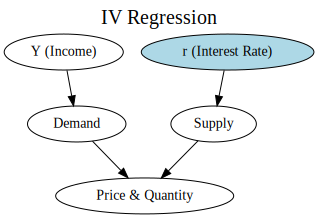

In [6]:
import graphviz
import matplotlib.pyplot as plt
import numpy as np

g = graphviz.Digraph()
g.attr('graph', label='IV Regression', labelloc='t', fontsize='20')
g.edge('Supply', 'Price & Quantity')
g.edge('Demand', 'Price & Quantity')
g.edge('r (Interest Rate)', 'Supply')
g.edge('Y (Income)', 'Demand')

g.node('r (Interest Rate)', fillcolor='lightblue', style='filled')

g

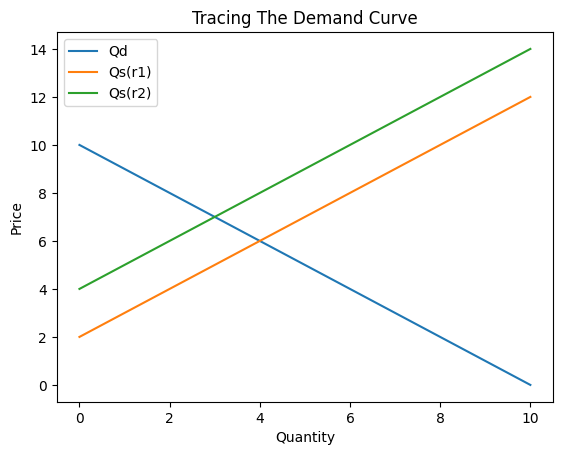

In [9]:
def demand(q):
    return 10 - q

def supply1(q):
    return q + 2

def supply2(q):
    return q + 4

q_values = np.linspace(0, 10, 100)

p_demand = demand(q_values)
p_supply1 = supply1(q_values)
p_supply2 = supply2(q_values)

plt.plot(q_values, p_demand, label='Qd')
plt.plot(q_values, p_supply1, label='Qs(r1)')
plt.plot(q_values, p_supply2, label='Qs(r2)')

plt.xlabel('Quantity')
plt.ylabel('Price')
plt.legend()
plt.title('Tracing The Demand Curve')

plt.show()

While this specification was done in order to recover the demand curve, the same technique can be applied in order to recover the supply curve with some manipulation of the equations. For the purposes of our project however, we will only be recovering the demand curve.

## Literature Overview

The simultaneity of changes in supply (or producer cost conditions) and changes in demand makes it difficult to estimate price elasticities using available price and output data. Ideally, we would estimate price elasticities of supply and demand by focusing on a given market at a fixed moment in time and observing the effect of instantaneous changes in prices on output. In practice, different prices can only occur at different moments in time, and both the supply and the demand curves are likely to have shifted during the time elapsed between observations, which obfuscates any calculation of elasticity. In his 1928 book , Phillip G. Wright proposed the introduction of factors “which affect demand conditions without affecting cost conditions or affect cost conditions without affecting demand conditions.” This is one of the earliest uses of instrumental variables in econometric literature. We want to find suitable instrumental variables for different commodities, use IV regression as described by Wright to estimate the price elasticity of demand for these commodities using Canadian market data, and compare our estimates to more contemporary estimates of price elasticities.

## Rerenences

WRIGHT, P. G. (1928). Appendix B. In The tariff on animal and vegetable oils (pp. 286–304), The Macmillan Company.